# Stat 305, Project 1

**You may work in teams of 2, submitting one notebook per team.**

**Type your name(s) here**

# Introduction

You should work through this notebook from start to finish.  Read the text and complete the parts as indicated.  Some code has already been provided.  Be sure to run this code and view the output to undestand what it does.  To run a cell, hold down SHIFT and hit ENTER.  In other parts, you will need to provide the code yourself; use the examples provided and the links as a guide. 

In this project you will use simulation to investigate further some of the problems that we have encountered in handouts or on homework.  Refer to the relevant handouts as necessary.  You will generate plots and approximate expected values, standard deviations, and probabilities.  Be sure to think about your plots and numbers and if they seem reasonable.

In this lab you will use the Python package [Symbulate](https://github.com/dlsun/symbulate).  A few specific links to the documentation are provided below, but it might make more sense if you read the documentation from start to finish.  **You should use only use Symbulate commands, not general Python code.**

To use Symbulate, you must first run (SHIFT-ENTER) the following commands.

In [1]:
from symbulate import *
%matplotlib inline

# Problem 1 - Rolling dice

**Refer to Handout 5, Exercise 6.11, and Exercise 10.1.**

This problem provides a quick introduction to Symbulate.  See Handout 5 and Symbulate documentation for more details.  There is nothing for you to do in Problem 1 other than to work through it and run each cell, noting the code syntax and the output it produces.

Setup: Roll a fair four-sided die twice and let $X$ be the sum of two rolls and $Y$ be the larger of the two rolls (or the common value if a tie).

The following defines the probability space (corresponding to the outcomes of the rolls) and the RVs.

In [2]:
P = BoxModel([1, 2, 3, 4], size=2, replace=True, order_matters=True)
X = RV(P, sum)
Y = RV(P, max)

The following code simulates 10000 values of $X$ and summarizes the results in a table and plot.

2,0.0642
3,0.1195
4,0.1908
5,0.2549
6,0.189
7,0.1241
8,0.0575
Total,1.0000000000000002


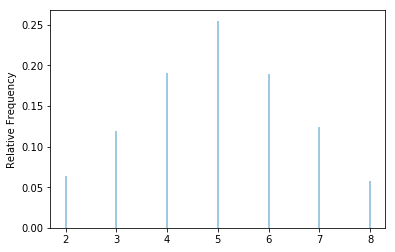

In [3]:
x = X.sim(10000)
x.plot()
x.tabulate(normalize=True)

Now use the simulation results to approximate the expected value, variance, and standard deviation of $X$.

In [4]:
x.mean(), x.var(), x.sd()

(4.9873, 2.44933871, 1.5650363286518305)

The following simulates 10000 $(X, Y)$ pairs and summarizes the results in a plot and a table, to approximate the joint distribution.  The `plot` option `"tile"` creates a plot where relative frequencies are represented by color intensities, and `"marginal"` adds plots of the marginal distributions.

"(2, 1)",638
"(3, 2)",1274
"(4, 2)",673
"(4, 3)",1259
"(5, 3)",1264
"(5, 4)",1203
"(6, 3)",631
"(6, 4)",1230
"(7, 4)",1227
"(8, 4)",601
Total,10000


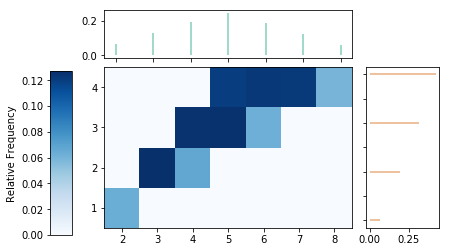

In [5]:
xy = (X & Y).sim(10000)
xy.plot(["tile", "marginal"])
xy.tabulate()

The following simulates 10000 values of $X$ given $Y=4$.  Note the syntax: use `|` for conditioning, and be sure to put the event being conditioned on in parentheses `(Y == 4)`.  Also note that using `.sim(10000)` with conditioning produces 10000 outcomes which satisfy the condition.

5,2814
6,2908
7,2859
8,1419
Total,10000


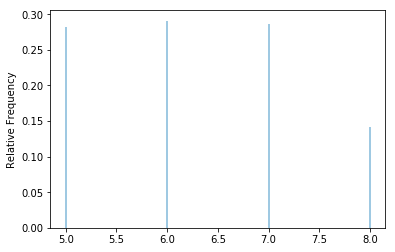

In [6]:
x_given_y = (X | (Y == 4) ).sim(10000)
x_given_y.plot()
x_given_y.tabulate()

The following simulates values of $XY$ (see Exercise 10.1 part k).

(16.8267, 76.07406710999999, 8.722044892684282)

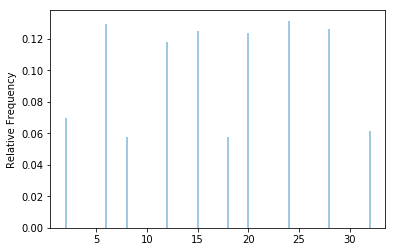

In [7]:
Z = X * Y
z = Z.sim(10000)
z.plot()
z.mean(), z.var(), z.sd()

# Problem 2 - Collector problem

**Somewhat related problems: Exercise 2.6, Exercise 4.12, HW1 problems 5 and 6, HW2 problem 1.**

Setup: 	Roll a fair six-sided die until each of the six faces is rolled at least once.  (Since Python uses zero-based indexing, it's a little more natural to think of the faces labeled 0, 1, ..., 5 instead of 1, 2, ..., 6.) Let $X$ be the total number of rolls needed.  Let $Y$ be the maximum number of rolls of any one face.  For example, for the sequence of rolls $\omega=(3, 0, 1, 5, 3, 5, 0, 0, 4, 3, 3, 5, 1, 4, 2)$, $X(\omega)=15$ (the last face obtained is 2 and that occurs on the 15th roll), and $Y(\omega)=4$ (face 3 is rolled 4 times).

The following Python code labels the "prizes" and defines a function which takes as an input a sequence of rolls and returns as an output the pair of $(X, Y)$ values.

In [8]:
n = 6 # define the number of "prizes"
prizes = list(range(n)) # label the prizes 0, 1, 2, ..., n-1

def number_prizes__max_count(outcome):
    prizes_so_far = []  
    for i, prize in enumerate(outcome):
        prizes_so_far.append(prize)
        if len(set(prizes_so_far)) == n:
            return i + 1, max([prizes_so_far.count(j) for j in prizes])

Here is the function evaluated for a sample outcome (sequence of rolls)

In [9]:
outcome = (3, 0, 1, 5, 3, 5, 0, 0, 4, 3, 3, 5, 1, 4, 2)
number_prizes__max_count(outcome)

(15, 4)

## Part a)

Define a probability space and RVs $X$ and $Y$.  (I did this one for you, but make sure you understand what it is doing.)

In [10]:
P = BoxModel(prizes, size=inf, replace=True, order_matters=True)
X, Y = RV(P, number_prizes__max_count)

## Part b)

Simulate 10000 values of $X$ and summarize the simulation results to approximate the distribution of $X$ and its expected value, variance, and standard deviation.  Also estimate $P(X>20)$ (hint: [use a `count` function](https://dlsun.github.io/symbulate/sim.html#count)).

(14.6665, 40.94567775000001, 6.3988809763895445, 0.1501)

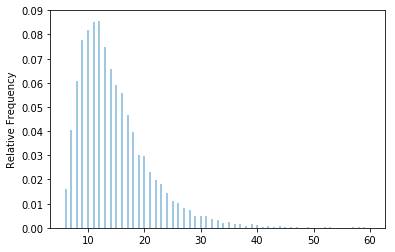

In [11]:
x = X.sim(10000)
x.plot()
x.mean(), x.var(), x.sd(), x.count_gt(20)/10000

## Part c)

Simulate 10000 values of $Y$ and summarize the simulation results to approximate the distribution of $Y$ and its expected value, variance, and standard deviation.  Also estimate $P(Y>10)$.

(4.4772, 4.05748016, 2.014318783112544, 0.0123)

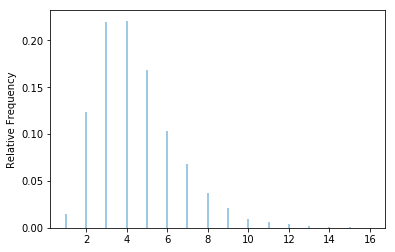

In [12]:
y = Y.sim(10000)
y.plot()
y.mean(), y.var(), y.sd(), y.count_gt(10)/10000

## Part d)

Use simulation to approximate the conditional distribution of $X$ given $Y=5$ and its conditional expected value, conditional variance, and conditional standard deviation.  Also estimate $P(X>10 | Y=5)$. 

(16.0084, 7.39312944, 2.719030974446595, 0.9906)

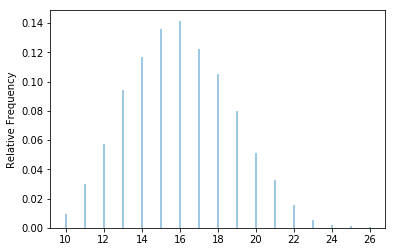

In [13]:
x_given_Yeq5 = (X | (Y == 5) ).sim(10000)
x_given_Yeq5.plot()
x_given_Yeq5.mean(), x_given_Yeq5.var(), x_given_Yeq5.sd(), x_given_Yeq5.count_gt(10) / 10000

# Problem 3 - Transformations of Uniformly distributed RVs

**Related problems: Exercise 6.10, Exercise 7.4, Exercise 10.2, HW2 problem 2.**

Setup: Let $U$ be a RV with a Uniform(0, 1) distribution.

0.498979559342894

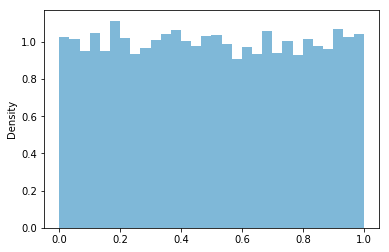

In [14]:
U = RV(Uniform(0, 1))
u = U.sim(10000)
u.plot()
u.mean()

For each of the following RVs, use simulation to approximate the distribution (display it in a plot), and the expected value.

## Part a)

$400 + 1200U$

4597.429532761294

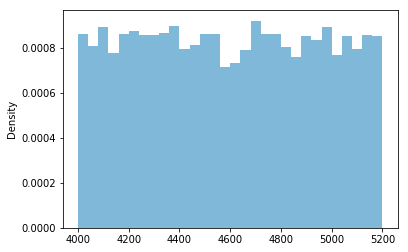

In [15]:
X = 4000 + 1200 * U
x = X.sim(10000)
x.plot()
x.mean()

## Part b)

$-\log(U)$ (Note: in Python and in R and in most contexts, $\log$ represents the natural log $\ln$)

0.9987120543850879

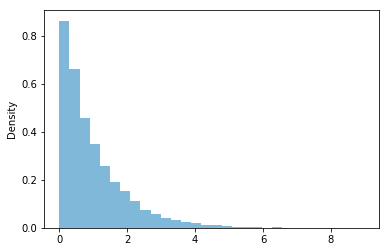

In [16]:
X = -log(U)
x = X.sim(10000)
x.plot()
x.mean()

## Part c)

$U^2$. (Note: `**` represents exponentiation in Python, e.g. `3**2 = 9`.)

0.33274736456046883

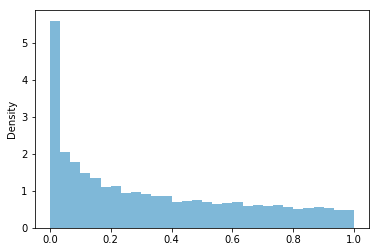

In [17]:
X = U**2
x = X.sim(10000)
x.plot()
x.mean()

## Part d)

$1-U$.

0.49909226846055915

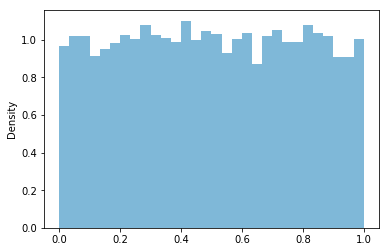

In [18]:
X = 1 - U
x = X.sim(10000)
x.plot()
x.mean()

Now consider the probability space corresponding to two values drawn independently from a Uniform(0, 1) distribution.

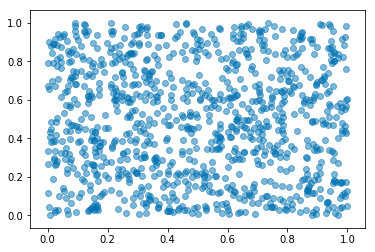

In [19]:
P = Uniform(0, 1) ** 2
U1, U2 = RV(P)
(U1 & U2).sim(1000).plot()

For each of the following RVs, use simulation to approximate the distribution (display it in a plot), and the expected value.

## Part e)

The sum of the values.

0.9928910109994751

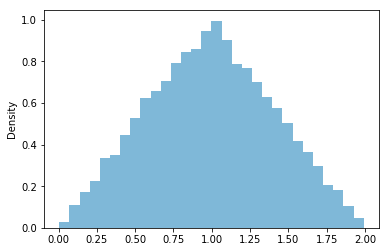

In [20]:
X = U1 + U2
x = X.sim(10000)
x.plot()
x.mean()

## Part f) 

The larger of the two values.  (Hint: unfortunately, the syntax `max(U1, U2)` won't work.  You can either define directly on the probspace as `RV(P, max)` or in terms of U1, U2 using [`apply`](https://dlsun.github.io/symbulate/sim.html#apply): `(U1 & U2).apply(max)`.)  

0.6670163806260934

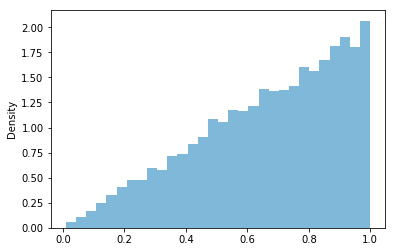

In [21]:
X = (U1 & U2).apply(max)
x = X.sim(10000)
x.plot()
x.mean()

## Part g) 

The product of the two values.

0.25001139222530117

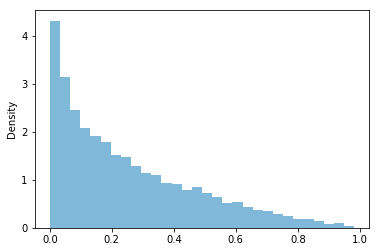

In [22]:
X = U1 * U2
x = X.sim(10000)
x.plot()
x.mean()

## Part h) 

The joint distribution of the sum of the two values and the larger of the two values.

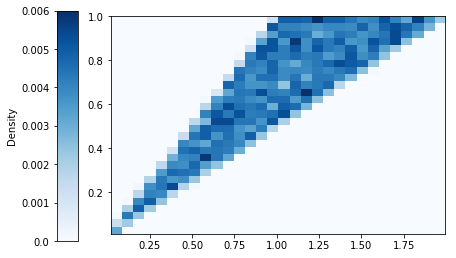

In [23]:
P = Uniform(0, 1) ** 2
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot('hist')

## Part i) 

The joint distribution of the product of the two values and the larger of the two values.

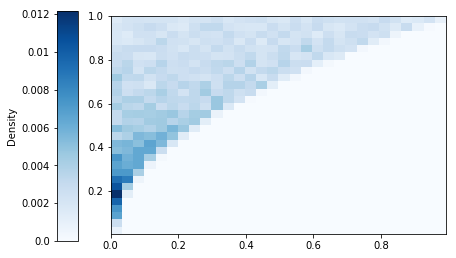

In [24]:
U1, U2 = RV(Uniform(0, 1) ** 2)
X = U1 * U2
Y = (U1 & U2).apply(max)
(X & Y).sim(10000).plot('hist')

## Part j) 

The joint distribution of the sum of the two values and the product of the two values.

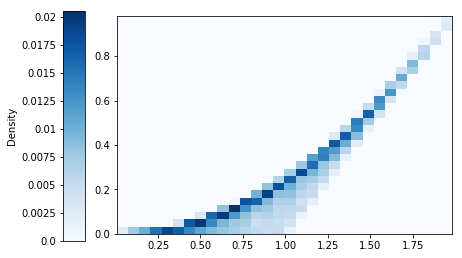

In [25]:
U1, U2 = RV(Uniform(0, 1) ** 2)
X = U1 + U2
Y = U1 * U2
(X & Y).sim(10000).plot('hist')

# Submission Instructions

Before submitting, revisit all the problems and check that your answers seem reasonable.  In particular look at your plots; can you intuitively justify the shapes of your plots?

Before you submit this notebook, click the "Kernel" drop-down menu at the top of this page and select "Restart & Run All". This will ensure that all of the code in your notebook executes properly.

We will re-run your notebook before grading your answers. You will lose points for a notebook with cells that do not run, even if your answers are correct, so please do not skip this step.  After re-running your notebook, scroll through it to make sure that everything has run properly.